# Trabajo Práctico 1
Para las imágenes que serán proporcionadas de Tito se pide:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las
variaciones de contraste.
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de
iluminación.

In [1]:
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

## Pasaje a coordenadas cromáticas

In [3]:
def convert2RGB(img_input: np.array):
    return cv.cvtColor(img_input, cv.COLOR_BGR2RGB)

In [4]:
def print_image(img_input: np.array):
    img_plot = cv.cvtColor(img_input, cv.COLOR_BGR2RGB)
    plt.imshow(img_plot)  
    plt.show()

In [5]:
def splitRGB(img: np.array):
    im_r,im_g,im_b = cv.split(img)
    return im_r,im_g,im_b

In [6]:
def convert2CromCoord(img_input: np.array, stability = 0.0001):
    r, g, b = splitRGB(img_input)
    
    den = r + g + b + stability
    
    ch_1 = r/den
    ch_2 = g/den
    ch_3 = b/den

    img_cc = np.stack((ch_1, ch_2, ch_3), axis=-1)
    return img_cc

In [7]:
# Read de imgs
img_cc_1 = cv.imread('./img/CoordCrom_1.png')
img_cc_2 = cv.imread('./img/CoordCrom_2.png')
img_cc_3 = cv.imread('./img/CoordCrom_3.png')

In [8]:
img_cc_1.shape

(996, 908, 3)

In [9]:
img_array = np.array([convert2RGB(img_cc_1), convert2RGB(img_cc_2), convert2RGB(img_cc_3)], dtype=int)
img_array.shape

(3, 996, 908, 3)

In [10]:
img_cc_array = np.zeros(img_array.shape)

for i, img in enumerate(img_array):
    img_cc_array[i] = convert2CromCoord(img)

/Users/ext_asalassa/.pyenv/versions/3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


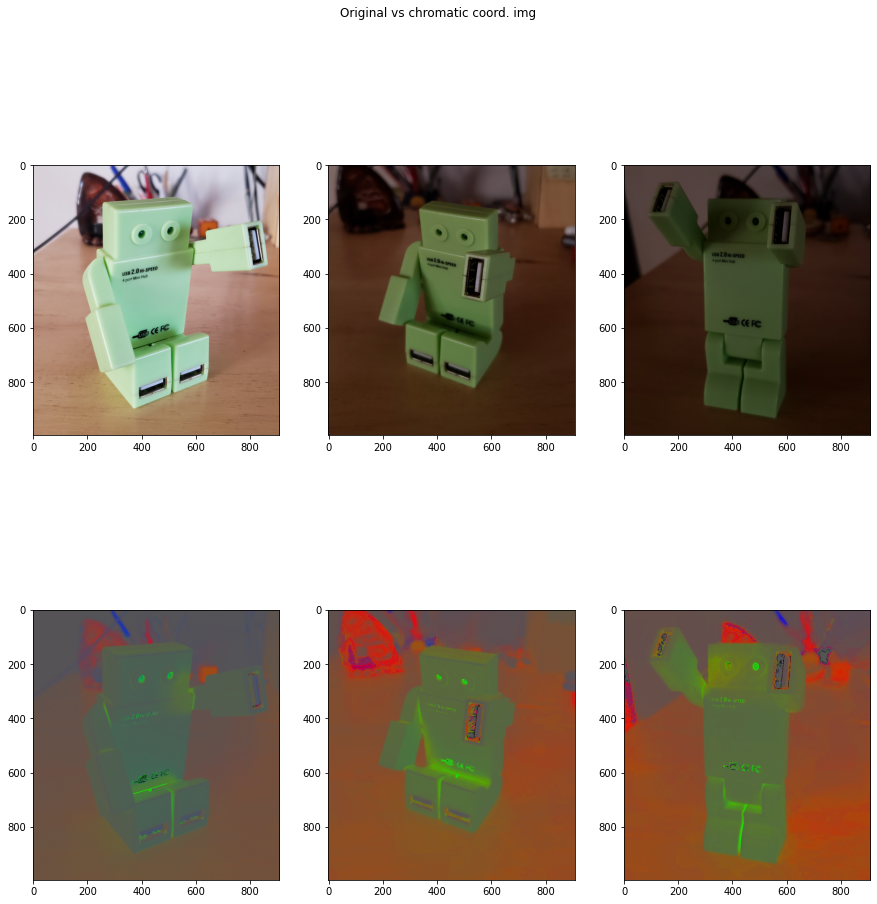

In [12]:
fig, axs = plt.subplots(2, len(img_array), figsize=(15,15))
fig.suptitle('Original vs chromatic coord. img')

for i, img in enumerate(img_array):
    axs[0, i].imshow(img)
    axs[1, i].imshow(img_cc_array[i])
    

fig.show()